<a href="https://colab.research.google.com/github/nils-imhoff/MaschineLearning/blob/master/%C3%9Cbung2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import numpy as np
import matplotlib.pyplot as plt

In [184]:
np.random.seed(2020)

In [185]:
#Daten
X = 2* np.random.rand(100,1)
y = 4+3*X + np.random.rand(100,1)

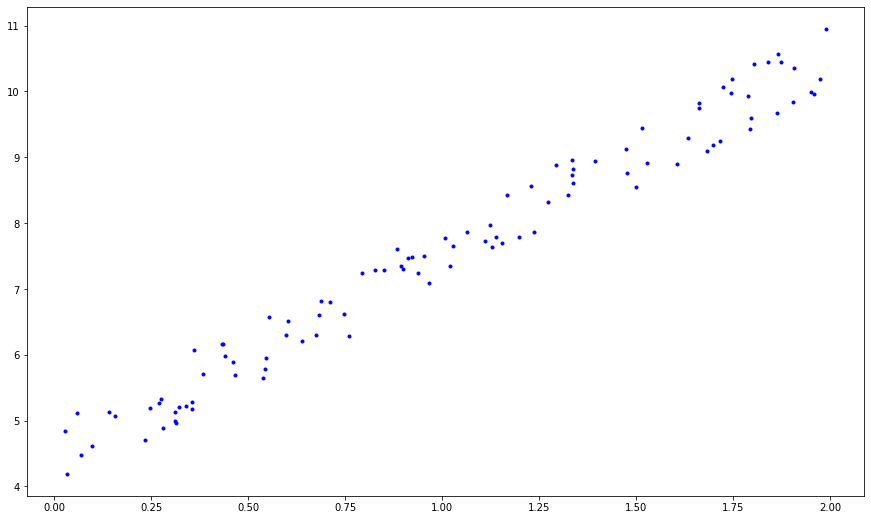

In [186]:
plt.figure(figsize=(15,9))
plt.plot(X,y,'b.')
plt.show()

In [187]:
X_unknown = np.array([[0],[2]])

In [188]:
from sklearn.linear_model import SGDRegressor

In [189]:
sgd_req = SGDRegressor()

In [190]:
sgd_req.fit(X,y.ravel())
#linear_model.SGDRegressor().fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [191]:
y_pred =sgd_req.predict(X_unknown)

In [192]:
b = sgd_req.intercept_
c = sgd_req.coef_

In [193]:
from sklearn.linear_model import LinearRegression

In [194]:
lin_reg = LinearRegression()
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [195]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [196]:
y_pred = lin_reg.predict(X_unknown)

In [197]:
b1 = lin_reg.intercept_ 
w1 = lin_reg.coef_ 

In [198]:
sqd_req1 = SGDRegressor(loss="huber")
sgd_req2 = SGDRegressor(max_iter=500)
sgd_req2 = SGDRegressor(learning_rate="constant", eta0 = 0.000001)

sgd_list = [sgd_req, sqd_req1, sgd_req2, sgd_req2]

for sgd in sgd_list:
  sgd.fit(X,y.ravel())
  y_pred = sgd.predict(X_unknown)
  b = lin_reg.intercept_ 
  w = lin_reg.coef_ 
  print("[SGD Hyperparams] %s\t%d\t%s (%f)" % (sgd.loss, sgd.max_iter, sgd.learning_rate,sgd.eta0))
  print("b=%f\tw=%f\ty_pred=%f\n\n" % (b[0], w[0], y_pred[0]))

[SGD Hyperparams] squared_loss	1000	invscaling (0.010000)
b=4.444755	w=3.054923	y_pred=4.057456


[SGD Hyperparams] huber	1000	invscaling (0.010000)
b=4.444755	w=3.054923	y_pred=3.415139


[SGD Hyperparams] squared_loss	1000	constant (0.000001)
b=4.444755	w=3.054923	y_pred=0.677782


[SGD Hyperparams] squared_loss	1000	constant (0.000001)
b=4.444755	w=3.054923	y_pred=0.677782




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
